<h1><center>CSE391, Quiz 3, Spring 2108 </center></h1>



1- Read the data in file named cities. The data includes ratings for 9 different indicators of the quality of life in 329 U.S. cities. These are climate, housing, health, crime, transportation, education, arts, recreation, and economics. For each category, a higher rating is better. For example, a higher rating for crime means a lower crime rate. (10 points)
 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# the data

Data = pd.read_csv('cities.csv')
Data.head()

(329, 10)

2-Make a boxplot to look at the distribution of the ratings data (10 points).

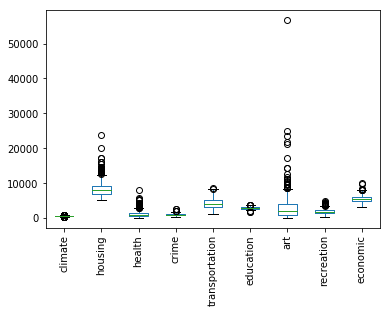

In [16]:


Data.plot.box()
plt.xticks(rotation=90)
plt.show()


3-Compute the  pairwise correlation between features, show the results using a heat map and also find two features that have highest correlation among these features (20 points)

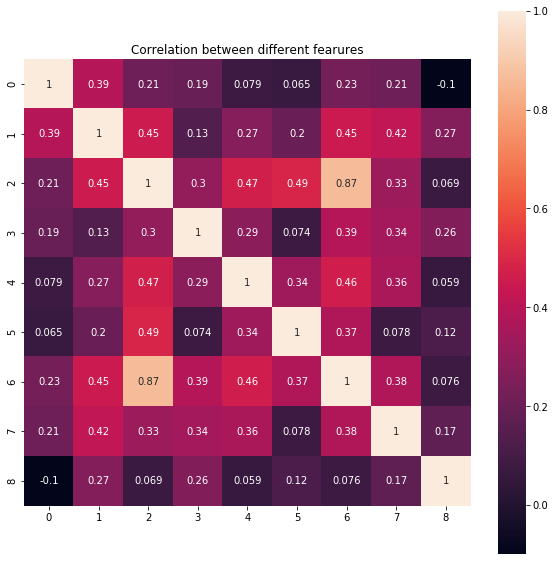

In [21]:

import seaborn as sns

X = Data.iloc[:,1:]
CorrX = np.corrcoef(X.T)
plt.figure(figsize=(10,10))
sns.heatmap(CorrX, vmax=1, square=True,annot=True)

plt.title('Correlation between different fearures')

plt.show()

4- Compute principal components.(20 points)

In [23]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA()
PCs = pca.fit_transform(X)
PCs.shape

(329, 9)

 5- Use a scatter plot to to display values for  two first PCs for a set of data. Do you observe any clusters in the scatter plot. if yes what does this clustering mean?(10 points)

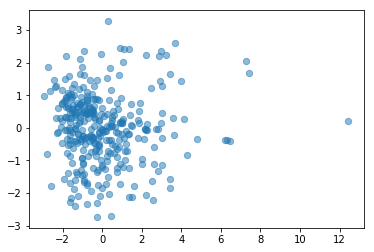

In [28]:
plt.scatter(PCs[:,0], PCs[:,2],  alpha=0.5,s= 40)
plt.show()

6- We would like to compress these features. If we choose only two first Pcs,
how much variance are explained by these two PCs. Reconstruct the original data 
 using these two PCs and compute the  reconstruction error (30 points)

Text(0,0.5,'explained_variance_')

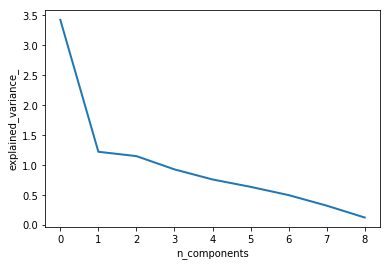

In [30]:
#explained_variance = pca.explained_variance_ratio_
#explained_variance

#plt.plot(explained_variance)

plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')



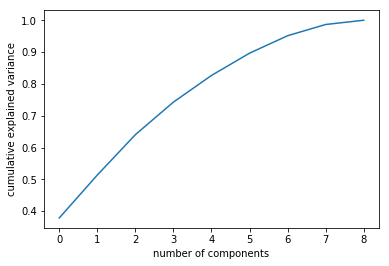

In [31]:
# or this approach
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [33]:
# Compute the components and projected faces
pca = PCA(2).fit(X)
components = pca.transform(X)
projected = pca.inverse_transform(components)
projected.shape

(329, 9)

In [37]:
mse = ((X - projected) ** 2).mean(axis=None)
print(mse)

0.48641467034


Further multiplying the first k PCs by the corresponding principal axes $V^⊤_k$ yields $X_k=U_k S_kV^⊤_k$ matrix that has the original n×p size but is of lower rank (of rank k). This matrix Xk provides a reconstruction of the original data from the first k PCs.